# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz
import os
import time





cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'N_ur': 2.0328,
'm_ncdm': 0.06,
}



# Compute linear matter power spectrum

## Method 1

In this method, $P(k,z)$ is obtained by interpolating a $z$ and $k$ grid. 

The number of points in the $k$ dimension is fixed by the emulators settings. 

The number of points in the $z$ dimension is fixed by the use via the parameter `ndim_redshifts`

In [11]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':'mPk',
'ndim_redshifts': 25
})
classy_sz.compute_class_szfast()

CPU times: user 55.5 ms, sys: 47 ms, total: 103 ms
Wall time: 82.1 ms


In [12]:
z = 0.3
kmin = 1e-3
kmax = 1e1
nks = 500
ks = np.geomspace(kmin,kmax,nks)
pks = classy_sz.pk_lin(ks,z)

[]

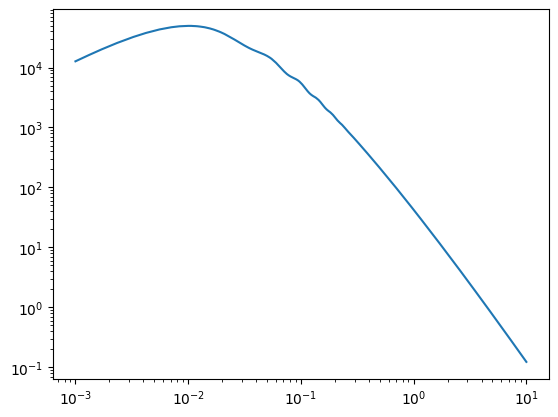

In [13]:
plt.plot(ks,pks)
plt.loglog()

In [14]:
# let's time it
%timeit -n 10 classy_sz.compute_class_szfast()

39.2 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Method 2

In this method, we first initialize the computation and then compute the pks.

The advantage of this method is that we don't go through the Pk interpolator at each evaluation when we call 
`classy_sz.get_pkl_at_z`

In [2]:
%%time
# initialize computation
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':'mPk',
})
classy_sz.compute_class_szfast()

CPU times: user 184 ms, sys: 96.7 ms, total: 281 ms
Wall time: 176 ms


In [7]:
%%time
z = 0.3
pks,ks = classy_sz.get_pkl_at_z(z,params_values_dict = cosmo_params)

CPU times: user 8.27 ms, sys: 6.21 ms, total: 14.5 ms
Wall time: 14.8 ms


[]

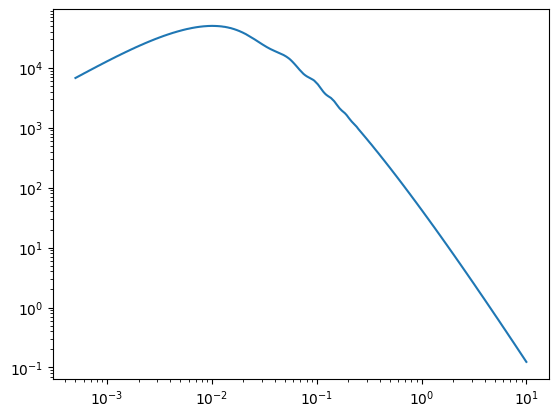

In [8]:
plt.plot(ks,pks)
plt.loglog()

In [10]:
# let's time it 
%timeit -n 10 classy_sz.get_pkl_at_z(z,params_values_dict = cosmo_params)

1.86 ms ± 493 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
